# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [2]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [3]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [4]:
start_date = '2020-01-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD', 'XRP-USD'] #your tickers of interest.

### The main part starts here:

In [5]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  3 of 3 completed


In [6]:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[INFO]: filter applied.


,BTC-USD,LTC-USD,XRP-USD
Datetime,,,
2020-04-18 18:00:00+01:00,7233.494141,43.709045,0.194548
2020-04-19 18:00:00+01:00,7216.310547,43.112511,0.192525
2020-04-20 18:00:00+01:00,6946.064941,41.361980,0.187205
2020-04-21 18:00:00+01:00,6894.629883,41.199726,0.185317
2020-04-22 18:00:00+01:00,7131.351562,42.204678,0.189034


In [7]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                   ticker = ['BTC-USD', 'LTC-USD', 'XRP-USD']                   |
|                             start date = 01/01/20                              |
|                              end date = 04/22/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dat

In [8]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 18:00:00,2020-01-11 18:00:00,8056.407841,8092.316211,200.891424,0.891424,0.004457
1,2020-01-13 18:00:00,2020-01-15 18:00:00,8159.626720,8710.168962,214.445869,13.554445,0.067471
2,2020-01-20 18:00:00,2020-01-22 18:00:00,8703.297439,8635.120274,212.766010,-1.679859,-0.007833
3,2020-01-23 18:00:00,2020-01-30 18:00:00,8372.618587,9450.361622,240.153749,27.387738,0.128722
4,2020-02-04 18:00:00,2020-02-06 18:00:00,9215.028143,9684.722914,252.394510,12.240761,0.050971
5,2020-02-08 18:00:00,2020-02-09 18:00:00,9854.609010,10013.333228,256.459727,4.065217,0.016107
6,2020-02-11 18:00:00,2020-02-12 18:00:00,10167.854639,10278.565529,259.252143,2.792416,0.010888
7,2020-02-16 18:00:00,2020-02-19 18:00:00,9843.817061,10121.483827,266.564927,7.312784,0.028207
8,2020-02-21 18:00:00,2020-02-23 18:00:00,9737.208008,9833.696578,269.206389,2.641462,0.009909
9,2020-02-26 18:00:00,2020-03-03 18:00:00,8823.553376,8684.136919,264.952796,-4.253593,-0.015800


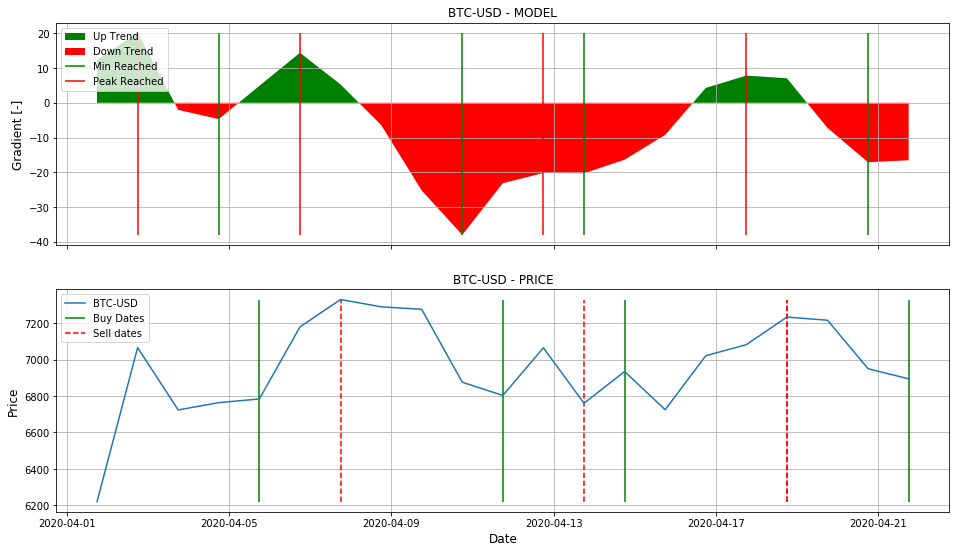

In [9]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date='2020-04-01')

In [9]:
imag_model = model.copy_model()

In [10]:
imag_model.append_timedelta(timedelta=1)

[USER-INPUT]: Overwrite existing data? y


In [11]:
imag_model.data.tail(5)

,BTC-USD,LTC-USD,XRP-USD
2020-04-19 18:00:00+01:00,7216.310547,43.112511,0.192525
2020-04-20 18:00:00+01:00,6946.064941,41.361980,0.187205
2020-04-21 18:00:00+01:00,6894.629883,41.199726,0.185317
2020-04-22 18:00:00+01:00,7131.351562,42.204678,0.189034
2020-04-23 18:00:00+01:00,NaN,NaN,NaN


In [12]:
imag_model.comp_break_values(tickers='all')

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Current ticker: LTC-USD
[INFO]: Current ticker: XRP-USD
[USER-INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'BTC-USD': 7131.3515625, 'LTC-USD': 42.20467758178711, 'XRP-USD': 0.1890338957309723}
[INFO]: Break values: {'BTC-USD': [7174.139671874361, 6857.5076624994535], 'LTC-USD': [42.24688225936967, 40.70219105987617], 'XRP-USD': [0.18899608895182443, 0.18302261784672588]}
[INFO]: Tolerances: {'BTC-USD': array([  42.78810937, -273.8439    ]), 'LTC-USD': array([ 0.04220468, -1.50248652]), 'XRP-USD': array([-3.78067791e-05, -6.01127788e-03])}


In [13]:
imag_model._init_model()
imag_model.data.tail(5)

[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************


,BTC-USD,LTC-USD,XRP-USD
2020-04-19 18:00:00+01:00,7216.310547,43.112511,0.192525
2020-04-20 18:00:00+01:00,6946.064941,41.361980,0.187205
2020-04-21 18:00:00+01:00,6894.629883,41.199726,0.185317
2020-04-22 18:00:00+01:00,7131.351562,42.204678,0.189034
2020-04-23 18:00:00+01:00,NaN,NaN,NaN


[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 6771.788816718211
[INFO]: New sell signal was detected for last value: 6771.788816718211.


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


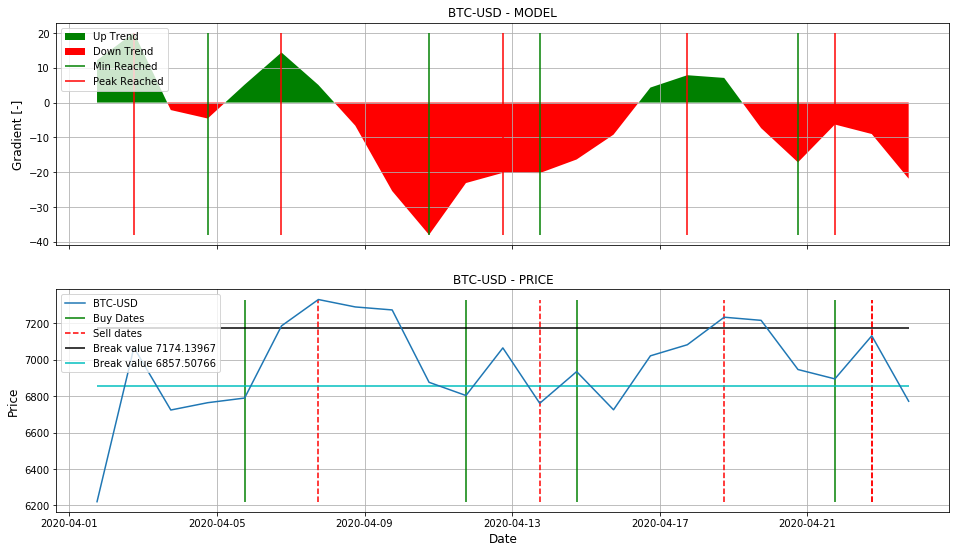

----------------------------------------------------------------------------------
[INFO]: Result for value: 7015.823667186907
[INFO]: New sell signal was detected for last value: 7015.823667186907.


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


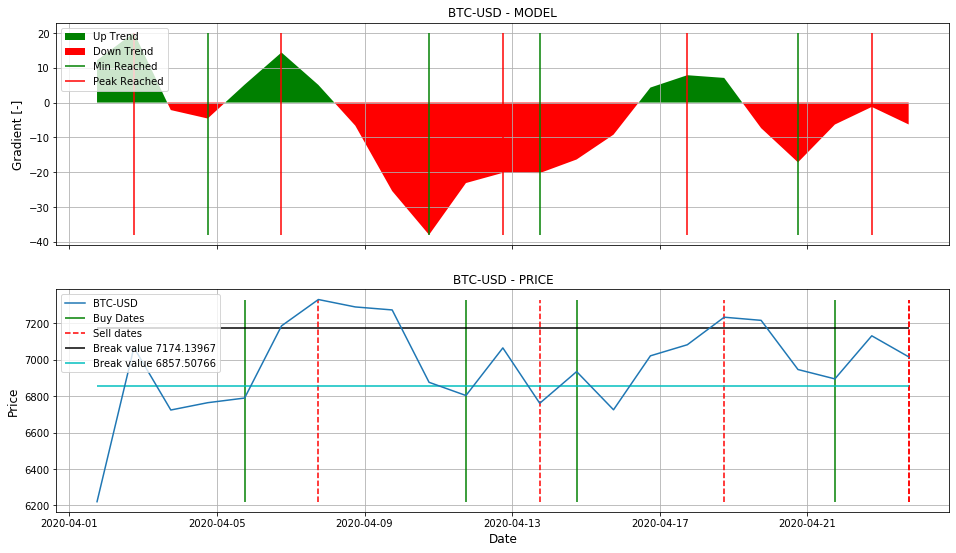

----------------------------------------------------------------------------------
[INFO]: Result for value: 7263.81641777279


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


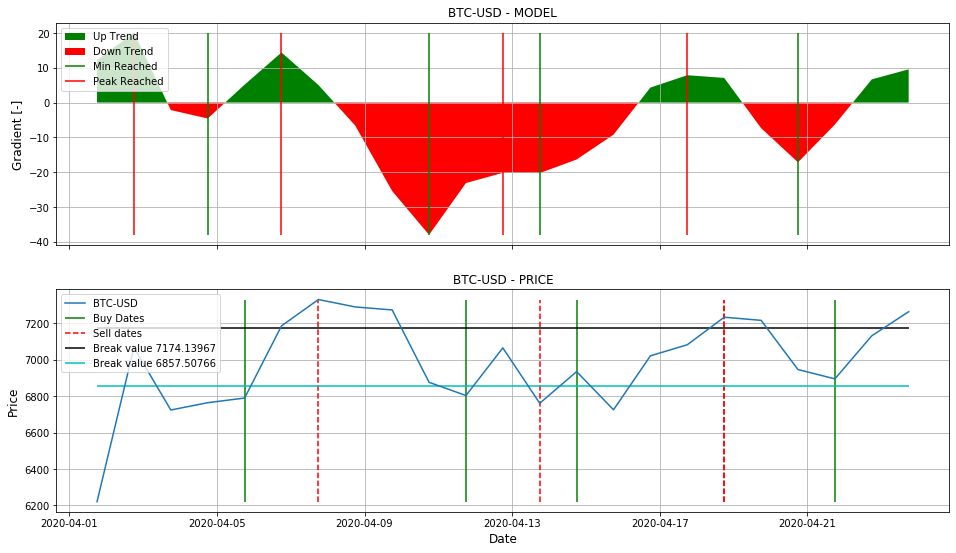

[INFO]: Current ticker: LTC-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 40.193413671627724
[INFO]: New sell signal was detected for last value: 40.193413671627724.


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


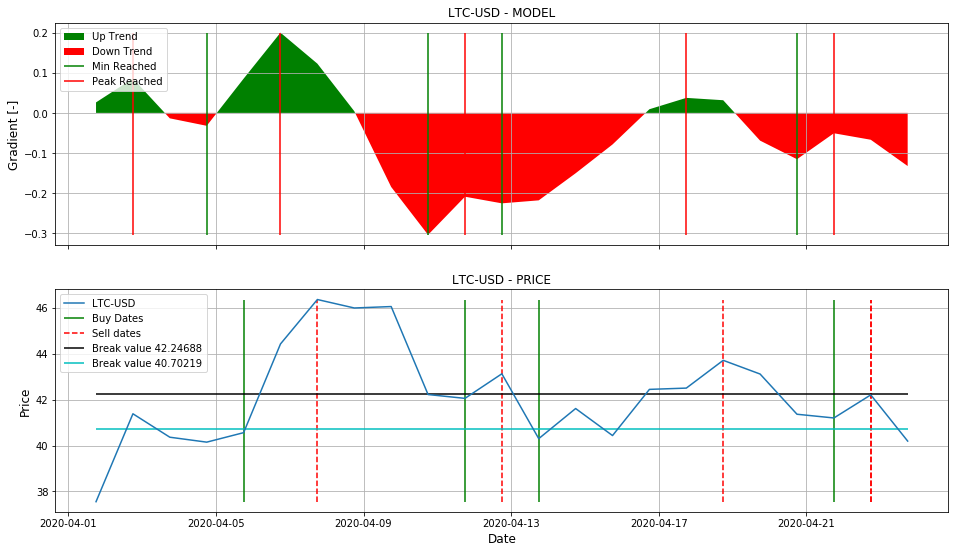

----------------------------------------------------------------------------------
[INFO]: Result for value: 41.47453665962292
[INFO]: New sell signal was detected for last value: 41.47453665962292.


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


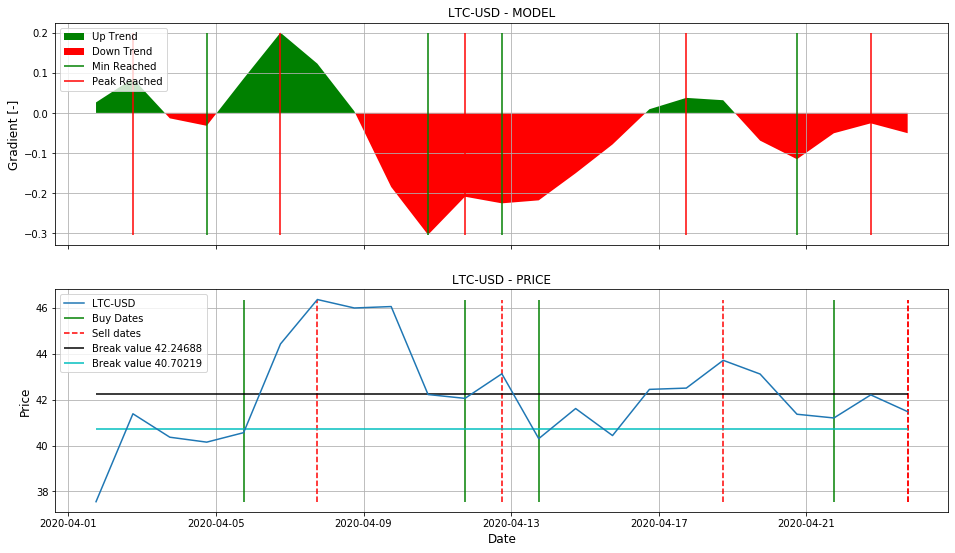

----------------------------------------------------------------------------------
[INFO]: Result for value: 42.77496828761179


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


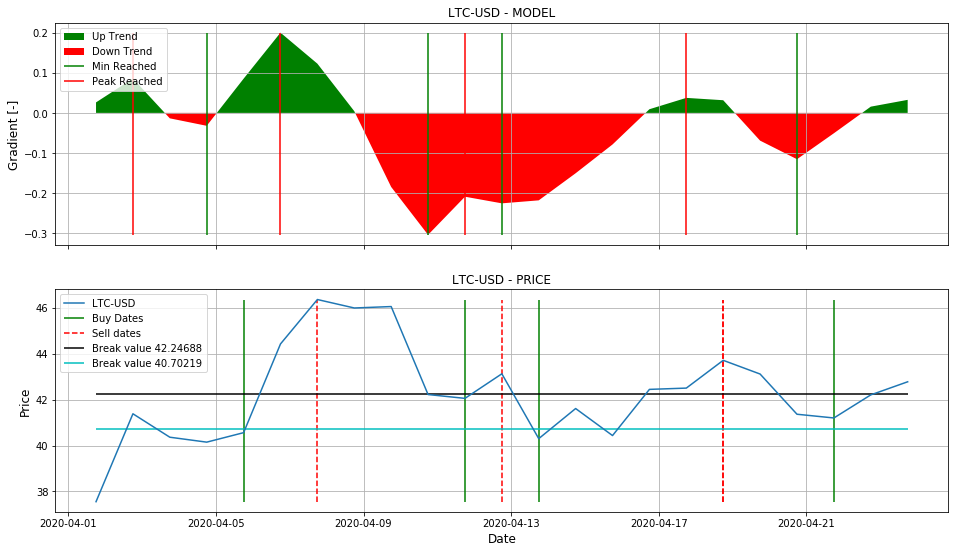

[INFO]: Current ticker: XRP-USD
----------------------------------------------------------------------------------
[INFO]: Result for value: 0.18073483512364183
[INFO]: New sell signal was detected for last value: 0.18073483512364183.


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


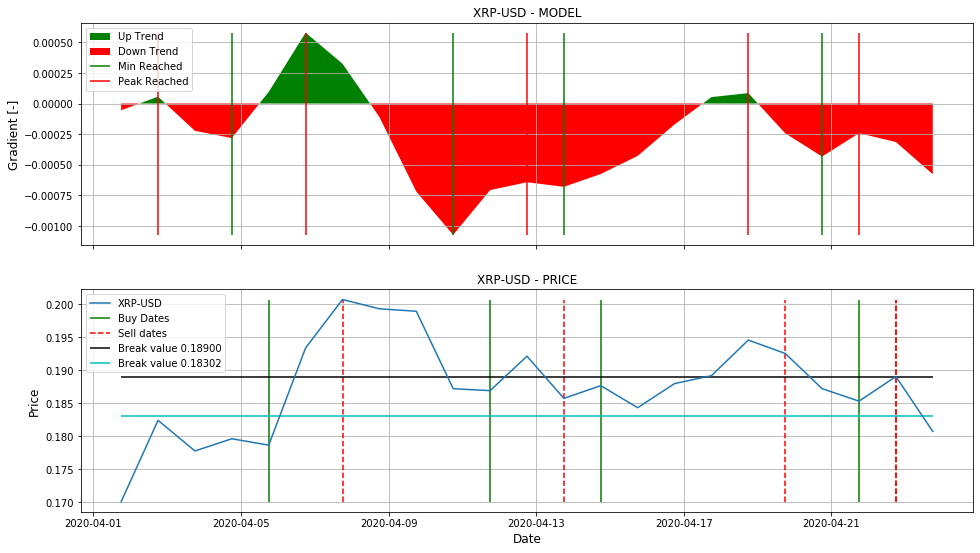

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.18600935339927516
[INFO]: New sell signal was detected for last value: 0.18600935339927516.


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


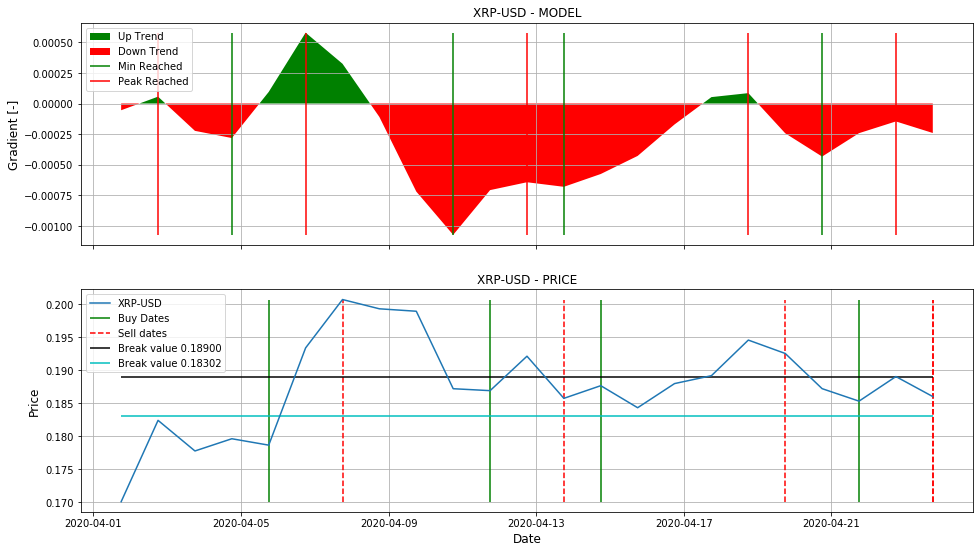

----------------------------------------------------------------------------------
[INFO]: Result for value: 0.19135854006372222


/Users/Marco/Documents/FINANCE/model.py:172: RuntimeWarning: invalid value encountered in greater
  good_calls = np.where(trade_wins > 0)
/Users/Marco/Documents/FINANCE/model.py:173: RuntimeWarning: invalid value encountered in less
  bad_calls = np.where(trade_wins < 0)
/Users/Marco/Documents/FINANCE/model.py:180: RuntimeWarning: invalid value encountered in greater
  average_win = np.mean(win_loss[np.where(win_loss > 0)])
/Users/Marco/Documents/FINANCE/model.py:181: RuntimeWarning: invalid value encountered in less
  average_loss = np.mean(win_loss[np.where(win_loss < 0)])


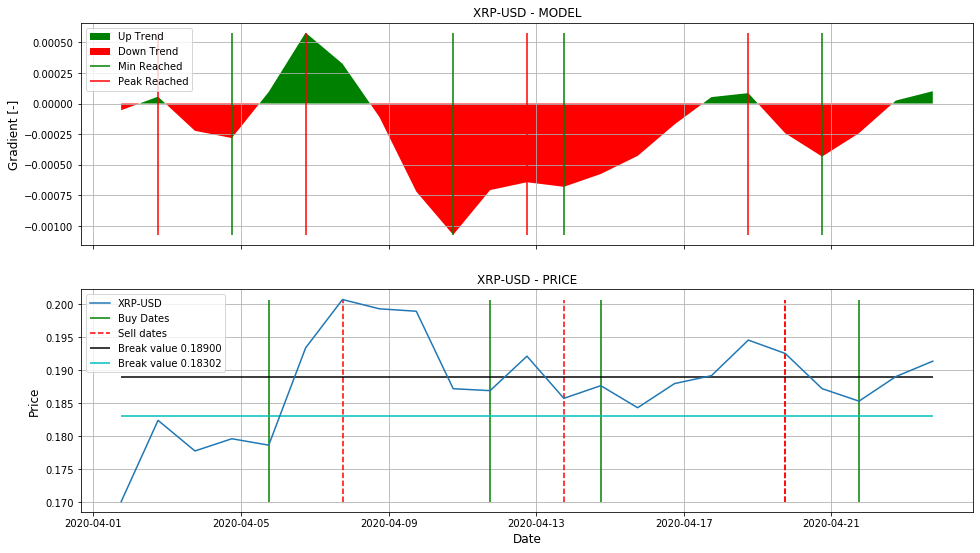

In [14]:
imag_model.show_possibilities(plot_from_date='2020-04-01', switch_axes=False, tickers='all')

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 7128.18701171875!
[STATS-INFO]: New tolerances: [  45.95266016 -270.67934922]!
[STATS-EVAL]: Probability for tol=-270.67935: 17.74%
[STATS-EVAL]: Probability for tol=45.95266: 44.33%
[STATS-EVAL]: Probability between: 26.59%


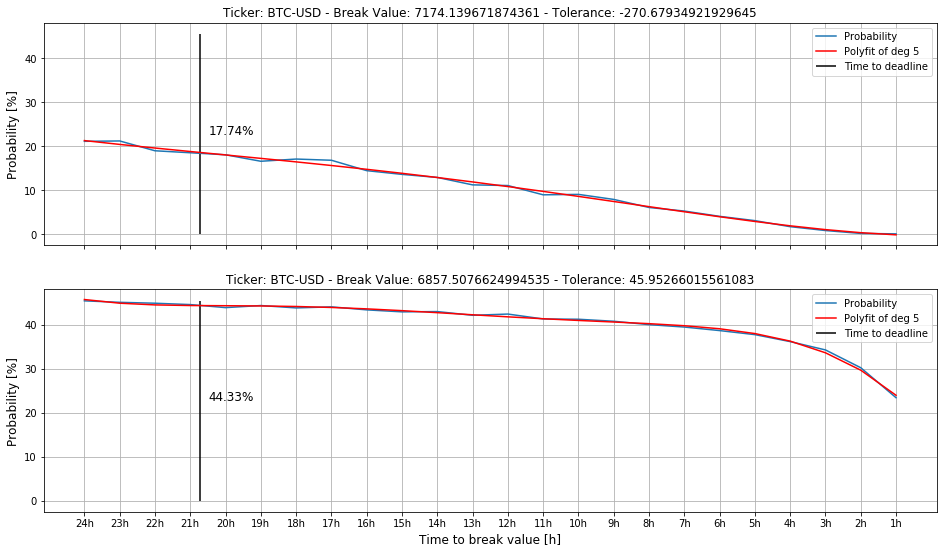

[INFO]: Current ticker: LTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 42.01841354370117!
[STATS-INFO]: New tolerances: [ 0.22846872 -1.31622248]!
[STATS-EVAL]: Probability for tol=-1.31622: 34.25%
[STATS-EVAL]: Probability for tol=0.22847: 47.51%
[STATS-EVAL]: Probability between: 13.26%


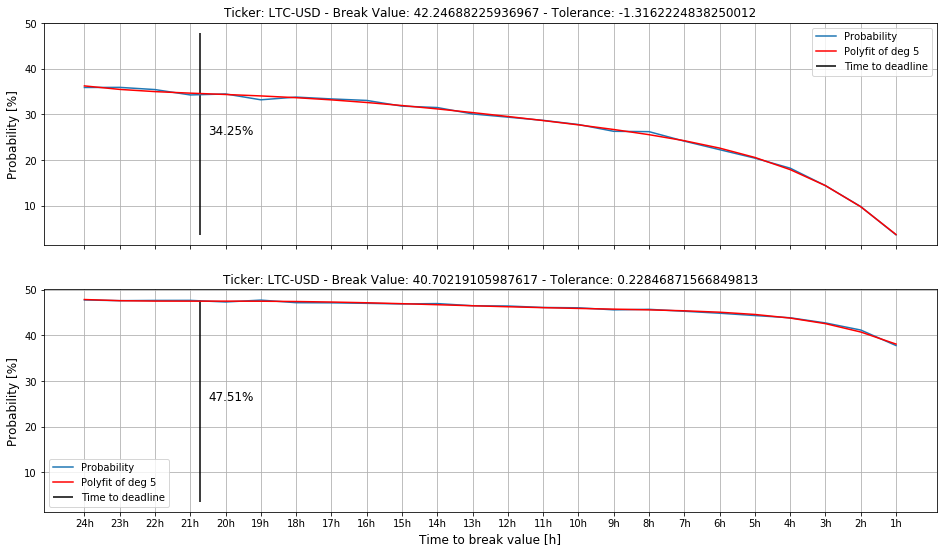

[INFO]: Current ticker: XRP-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 0.18872645497322083!
[STATS-INFO]: New tolerances: [ 0.00026963 -0.00570384]!
[STATS-EVAL]: Probability for tol=-0.00570: 31.27%
[STATS-EVAL]: Probability for tol=0.00027: 47.75%
[STATS-EVAL]: Probability between: 16.47%


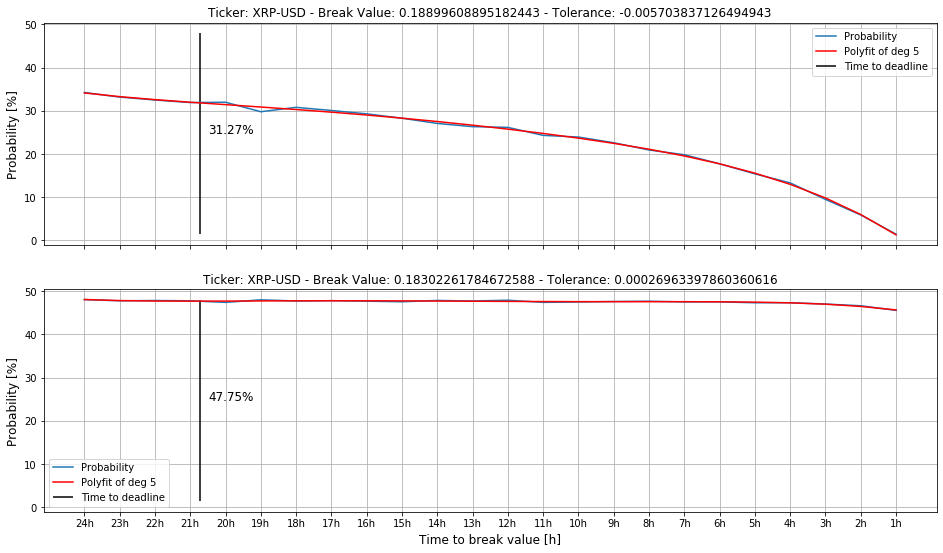

In [18]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

In [ ]:
#TODO: Implement this: 
#from model import STATISTICAL_MODEL
#stat_model = STATISTICAL_MODEL(imag_model)

In [21]:
import multiprocessing as mp

In [25]:
print(mp.cpu_count())

4
